In [ ]:
#Importar librerias necesarias
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import fetch_california_housing
from sklearn.cluster import KMeans

In [ ]:
# Cargar (importar) un dataset - Mercado Inmobiliario en California
california = fetch_california_housing(download_if_missing=True)
df = pd.DataFrame(california.data, columns=california.feature_names)
df['Price'] = california.target

print(df.head())

   MedInc  HouseAge  AveRooms  AveBedrms  ...  AveOccup  Latitude  Longitude  Price
0  8.3252      41.0  6.984127   1.023810  ...  2.555556     37.88    -122.23  4.526
1  8.3014      21.0  6.238137   0.971880  ...  2.109842     37.86    -122.22  3.585
2  7.2574      52.0  8.288136   1.073446  ...  2.802260     37.85    -122.24  3.521
3  5.6431      52.0  5.817352   1.073059  ...  2.547945     37.85    -122.25  3.413
4  3.8462      52.0  6.281853   1.081081  ...  2.181467     37.85    -122.25  3.422

[5 rows x 9 columns]


In [ ]:
# Elegir las variables X (en este caso no estamos hablando de predictoras, sino variables para analisis de patrones)
# -- Vamos a definir X como latitudes y longitudes, para ello vamos a definir un K (de K-Means) igual a 6, significa que se agruparan en 6 zonas
X = df[["Latitude", "Longitude"]]

# Definiendo el modelo de clustering con K-Means
valor_k = 4
model = KMeans(n_clusters=valor_k, random_state=42, n_init=10)
df["Cluster"] = model.fit_predict(X)

In [ ]:
print(df.head(20))
print(df.tail(20))

    MedInc  HouseAge  AveRooms  AveBedrms  ...  Latitude  Longitude  Price  Cluster
0   8.3252      41.0  6.984127   1.023810  ...     37.88    -122.23  4.526        0
1   8.3014      21.0  6.238137   0.971880  ...     37.86    -122.22  3.585        0
2   7.2574      52.0  8.288136   1.073446  ...     37.85    -122.24  3.521        0
3   5.6431      52.0  5.817352   1.073059  ...     37.85    -122.25  3.413        0
4   3.8462      52.0  6.281853   1.081081  ...     37.85    -122.25  3.422        0
5   4.0368      52.0  4.761658   1.103627  ...     37.85    -122.25  2.697        0
6   3.6591      52.0  4.931907   0.951362  ...     37.84    -122.25  2.992        0
7   3.1200      52.0  4.797527   1.061824  ...     37.84    -122.25  2.414        0
8   2.0804      42.0  4.294118   1.117647  ...     37.84    -122.26  2.267        0
9   3.6912      52.0  4.970588   0.990196  ...     37.84    -122.25  2.611        0
10  3.2031      52.0  5.477612   1.079602  ...     37.85    -122.26  2.815  

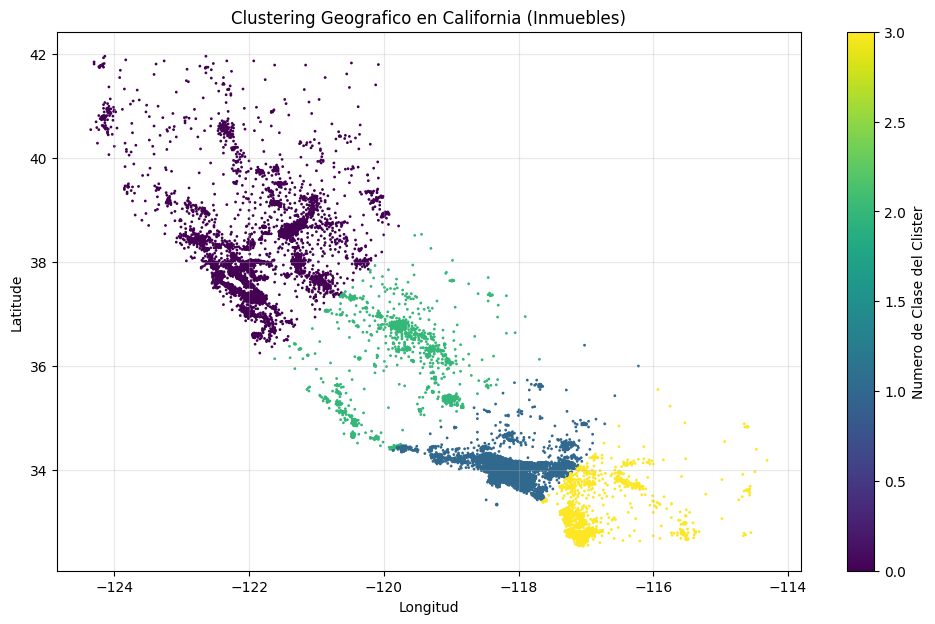

In [ ]:
# Visualizar los clusters de forma grafica
plt.figure(figsize=(12,7))
scatter = plt.scatter(df['Longitude'], df['Latitude'], c=df['Cluster'], cmap="viridis", s=1)
plt.colorbar(scatter, label='Numero de Clase del Clister')
plt.title('Clustering Geografico en California (Inmuebles)')
plt.xlabel('Longitud')
plt.ylabel('Latitude')
plt.grid(True, alpha=0.3)
plt.show()

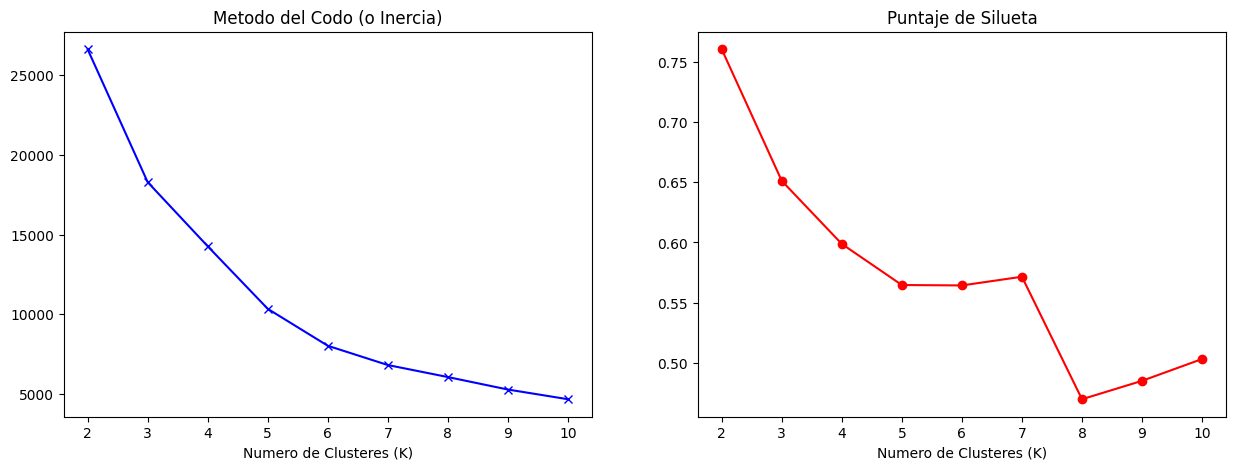

In [ ]:
# Agregamos la libreria de metrica de coeficiente de silueta
from sklearn.metrics import silhouette_score

# Dos indicadores para estimar K (Elbow Moment y Silhouette - Diagrama del Codo y El Coeficiete de Silueta)
inercias = []
siluetas = []
rango_k = range(2, 11)

# Hallando Codo y Silueta
for k in rango_k:
  kmeans_model = KMeans(n_clusters=k, random_state=42, n_init=10)
  labels = kmeans_model.fit_predict(X)

  #-- Hallando la inercia del modelo KMeans para el numero de clusters K
  inercias.append(kmeans_model.inertia_)
  #-- Hallando el coeficiente de silueta
  siluetas.append(silhouette_score(X, labels, sample_size=1000))

# Figuras (ax1 y ax2)
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 5))

# Graficando el Diagrama de Codo
ax1.plot(rango_k, inercias, "bx-")
ax1.set_title('Metodo del Codo (o Inercia)')
ax1.set_xlabel('Numero de Clusteres (K)')

# Graficando el Diagrama de Coeficientes de Silueta
ax2.plot(rango_k, siluetas, "ro-")
ax2.set_title('Puntaje de Silueta')
ax2.set_xlabel('Numero de Clusteres (K)')

# Mostrar el grafico
plt.show()

In [ ]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   MedInc      20640 non-null  float64
 1   HouseAge    20640 non-null  float64
 2   AveRooms    20640 non-null  float64
 3   AveBedrms   20640 non-null  float64
 4   Population  20640 non-null  float64
 5   AveOccup    20640 non-null  float64
 6   Latitude    20640 non-null  float64
 7   Longitude   20640 non-null  float64
 8   Price       20640 non-null  float64
 9   Cluster     20640 non-null  int32  
dtypes: float64(9), int32(1)
memory usage: 1.5 MB
None
